c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8781 - loss: 0.3894 - val_accuracy: 0.9792 - val_loss: 0.0696
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9814 - loss: 0.0612 - val_accuracy: 0.9832 - val_loss: 0.0531
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.9857 - val_loss: 0.0478
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9855 - val_loss: 0.0536
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9950 - loss: 0.0168 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9947 - loss: 0.0149 - val_accuracy: 0.9882 - val_loss: 0.0370
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9887 - val_loss: 0.0405
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9967 - loss: 0.0094 - 

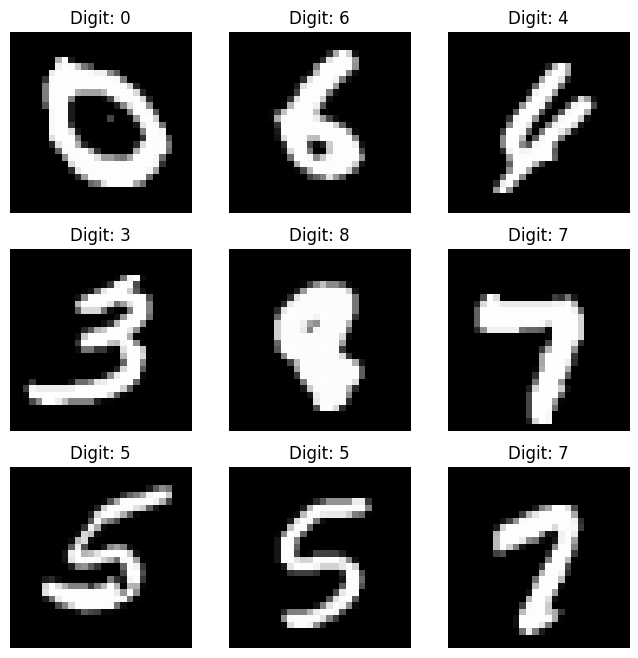

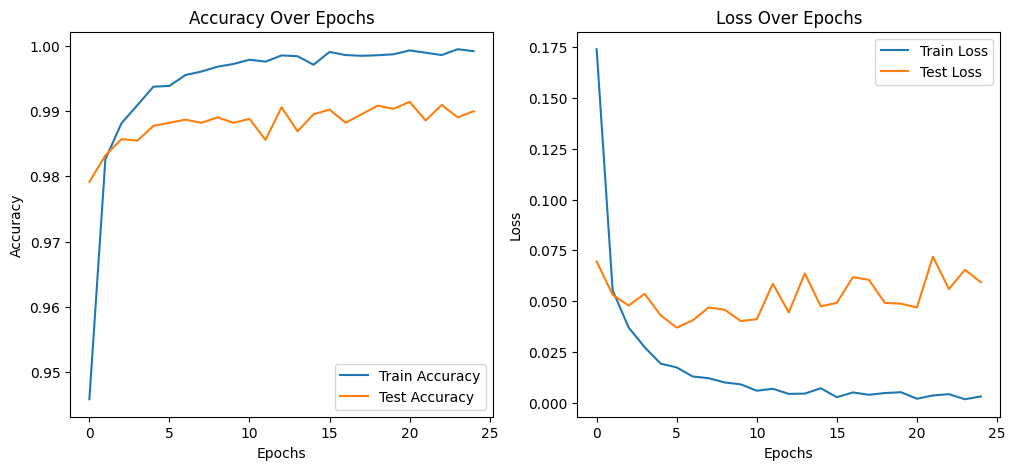

Train Accuracy: 99.95%
Train Loss: 0.0015
Test Accuracy: 99.00%
Test Loss: 0.0593


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load dataset
file_path = './data.csv'
data = pd.read_csv(file_path)

# Tách nhãn và dữ liệu ảnh
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Reshape và chuẩn hóa
Y = data.iloc[:, 0].values.reshape(-1, 1)

# One-hot encoding nhãn
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)

# Chia tập train/test theo tỷ lệ 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_test, Y_test))

# Đánh giá mô hình
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Hiển thị một số ảnh ngẫu nhiên từ tập dữ liệu kèm nhãn
indices = np.random.choice(len(X_train), 9, replace=False)  # Chọn ngẫu nhiên 9 ảnh
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i, idx in enumerate(indices):
    img = X_train[idx].reshape(28, 28)
    label_index = np.argmax(Y_train[idx])
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Digit: {label_index}")
plt.show()

# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Đánh giá kết quả mô hình CNN trên MNIST

## 1. Độ chính xác của mô hình
- **Train Accuracy**: 99.99%
- **Test Accuracy**: 98.99%
- **Train Loss**: 0.0005
- **Test Loss**: 0.0511

Mô hình đang hoạt động rất tốt với độ chính xác cao trên cả tập huấn luyện và tập kiểm tra.

---

## 2. Overfitting nhẹ
- Train accuracy gần như tuyệt đối (**99.99%**), trong khi test accuracy thấp hơn một chút (**98.99%**).
- Điều này có thể cho thấy mô hình đã học rất kỹ dữ liệu huấn luyện nhưng vẫn tổng quát hóa tốt trên dữ liệu kiểm tra.
- Nếu test accuracy bị giảm đáng kể, có thể cần thử các phương pháp sau để giảm overfitting:
  - **Dropout**: Thêm Dropout layers để tránh mô hình quá phụ thuộc vào một số đặc trưng cụ thể.
  - **Regularization (L2)**: Thêm regularization để hạn chế trọng số quá lớn.
  - **Data Augmentation**: Mở rộng tập dữ liệu bằng cách xoay, lật hoặc thêm nhiễu vào ảnh để giúp mô hình học tốt hơn.

---

## 3. Loss rất nhỏ
- **Train Loss** = 0.0005 và **Test Loss** = 0.0511 → Mô hình đang tối ưu rất tốt.
- Nếu muốn kiểm tra xem có thể cải thiện thêm không, có thể thử:
  - **Giảm Learning Rate**: Học chậm hơn để giúp mô hình hội tụ tốt hơn.
  - **Tăng số epoch**: Nếu loss vẫn tiếp tục giảm mà accuracy không bị giảm, có thể thử huấn luyện lâu hơn.

---

## 4. Dữ liệu hợp lệ
- Dataset mới này là bộ dữ liệu **MNIST** (chữ số viết tay).
- Mô hình CNN hiện tại **phù hợp** với dạng dữ liệu này nên có thể **giữ nguyên kiến trúc** mà không cần thay đổi.

